# Set up 

In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

notebook_directory = os.getcwd()
module_path = os.path.abspath(os.path.join(notebook_directory, "../models/src/"))
sys.path.append(module_path)
from exploratory_data_analysis import data_cleaning_and_preprocessing

# Scatter plot of temperatures

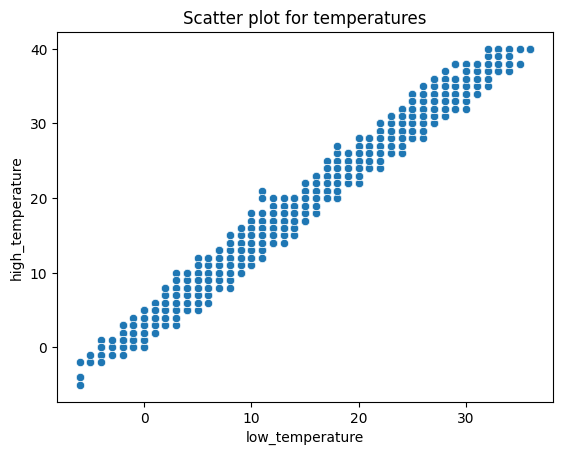

In [2]:
df = data_cleaning_and_preprocessing()
def scatter_plot_of_temperatures(df):
    plt.title("Scatter plot for temperatures")
    sns.scatterplot(x=df["low_temperature"], y=df["high_temperature"])
    plt.show()
scatter_plot_of_temperatures(df)

# Visualize mean of low and high temperatures over month

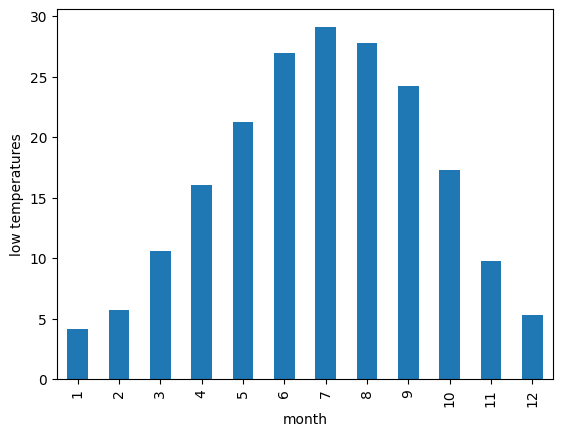

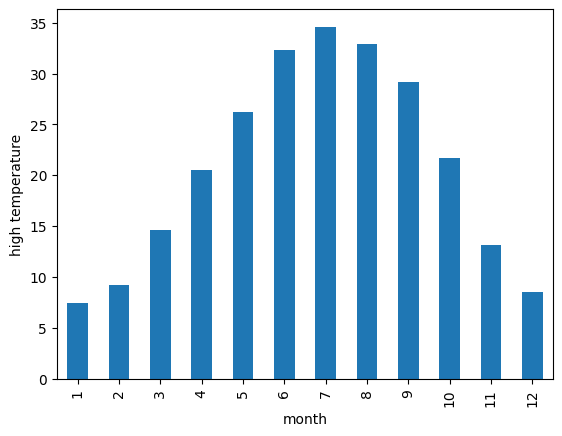

In [3]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.month
df.groupby(df["month"])["low_temperature"].mean().plot(kind='bar')
plt.ylabel("low temperatures")
plt.show()

df.groupby(df["month"])["high_temperature"].mean().plot(kind='bar')
plt.ylabel("high temperature")
plt.show()

# Visualized temperatures over years

/tmp/ipykernel_94646/1935504156.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


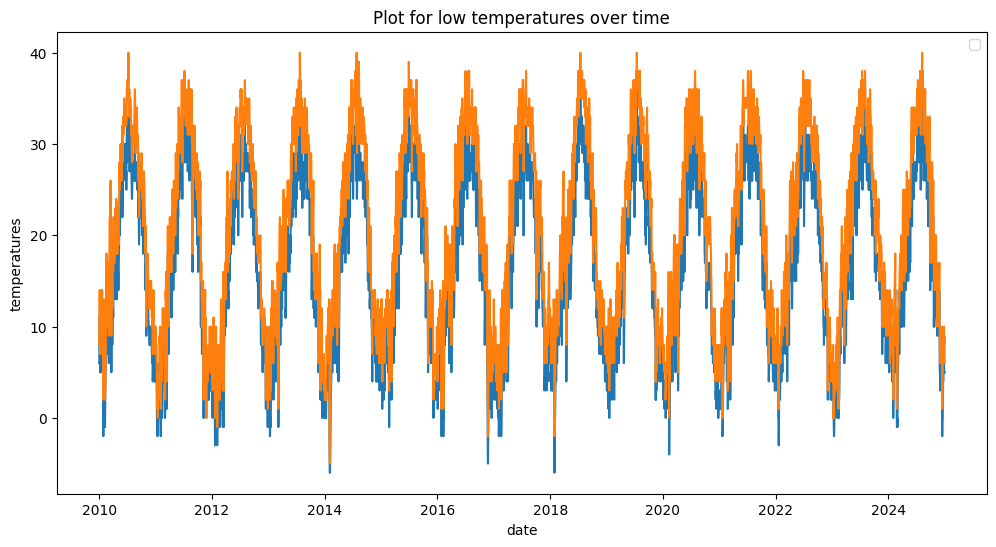

In [4]:
def plot_time_series(df):
    plt.figure(figsize=(12, 6))
    plt.plot(df["date"], df["low_temperature"])
    plt.plot(df["date"], df["high_temperature"])
    plt.legend()
    plt.title("Plot for low temperatures over time")
    plt.xlabel("date")
    plt.ylabel("temperatures")
    plt.show()
plot_time_series(df)

# Check for outliers and visualize


In [5]:
def check_for_outliers_in_temperatures_per_month(df, column):
    df["month"] = pd.to_datetime(df["date"]).dt.month
    for month in range(1, 13):
        temperature_per_month = df[df["month"] == month][column]
        Q1 = temperature_per_month.quantile(0.25)
        Q3 = temperature_per_month.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = temperature_per_month[
            (temperature_per_month < lower_bound)
            | (temperature_per_month > upper_bound)
        ]
        return outliers
    
print(check_for_outliers_in_temperatures_per_month(df, "low_temperature"))
print(check_for_outliers_in_temperatures_per_month(df, "high_temperature"))

2945   -6.0
2946   -5.0
Name: low_temperature, dtype: float64
Series([], Name: high_temperature, dtype: float64)
